In [172]:
import pandas as pd
from nltk import tokenize, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle

In [3]:
btc = pd.read_csv('../data/btcusd.csv')

# Reddit comments

In [154]:
COINLIST = {
#     'ETH': 'Ethereum',
    'BTC': 'Bitcoin',
#     'XMR': 'Monero',
#     'LTC': 'Litecoin',
#     'DASH': 'Dash'
}

In [155]:
def extract_subject(words):
    subjects = set()
    for word in words:
        if word in COINLIST.keys() or word.upper() in COINLIST.keys():
            subjects.add(COINLIST[word.upper()])
        elif word in COINLIST.values() or word.capitalize() in COINLIST.values():
            subjects.add(word.capitalize())
    return list(subjects)

In [93]:
sid = SentimentIntensityAnalyzer()

In [94]:
reddit = pd.read_csv('../data/reddit_comments_20180101.csv', low_memory=False)

In [95]:
reddit['sentence'] = reddit['body'].apply(tokenize.sent_tokenize)

In [119]:
reddit['created_utc'] = pd.to_datetime(reddit['created_utc'])

In [96]:
reddit = reddit.explode('sentence')

In [98]:
reddit['words'] = reddit['sentence'].apply(tokenize.word_tokenize) 

In [156]:
reddit['subjects'] = reddit['words'].apply(extract_subject)

In [157]:
reddit = reddit.loc[reddit['subjects'].apply(len) > 0]

In [158]:
reddit['sentiment'] = reddit['sentence'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [159]:
reddit = reddit.explode('subjects')

In [160]:
basetable = reddit[['subjects', 'created_utc', 'sentiment']].sort_values('created_utc')

In [161]:
basetable = basetable.set_index('created_utc')

In [162]:
bt_1h = basetable.groupby('subjects')['sentiment'].rolling('1d').mean()
bt_1h.name = 'sentiment_1h'

In [163]:
bt_1h = basetable.groupby('subjects')['sentiment'].rolling('2h').mean()
bt_1h.name = 'sentiment_1h'

In [164]:
bt_1h = basetable.groupby('subjects')['sentiment'].rolling('1h').mean()
bt_1h.name = 'sentiment_1h'

In [165]:
bt_1d = basetable.groupby('subjects')['sentiment'].rolling('1d').mean()
bt_1d.name = 'sentiment_1d'

In [166]:
basetable = pd.concat([bt_1h, bt_1d], 1).reset_index()

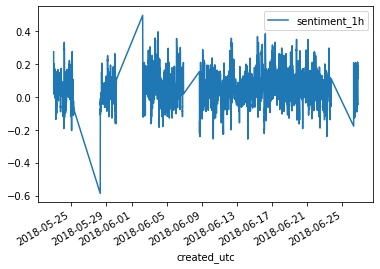

In [171]:
basetable.plot('created_utc', 'sentiment_1h')

In [130]:
basetable_1d

subjects  created_utc              
Bitcoin   2018-05-23 01:02:57+00:00    0.273200
          2018-05-23 01:08:30+00:00    0.136600
          2018-05-23 01:08:39+00:00    0.091067
          2018-05-23 01:09:06+00:00    0.068300
          2018-05-23 01:09:15+00:00    0.054640
                                         ...   
Monero    2018-06-26 15:37:54+00:00    0.034374
          2018-06-26 17:00:46+00:00    0.032942
          2018-06-26 18:04:59+00:00    0.005680
          2018-06-26 18:23:06+00:00   -0.003135
          2018-06-26 19:36:30+00:00   -0.003019
Name: sentiment, Length: 25411, dtype: float64